In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df = pd.read_csv("train.csv")

In [74]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.shape

(891, 12)

In [76]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [77]:
df['Sex'].replace(['male','female'],[1,0],inplace=True)
df['Embarked'].replace(['S','C','Q'],[1,2,3],inplace= True)
df.drop('Cabin',axis = 1,inplace=True)
df.drop('Ticket',axis =1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Fare',axis=1,inplace=True)

In [78]:
df["Age"].min()

0.42

In [79]:
df[df[df['Age']>20]<40]['Survived'].sum()

208.0

In [80]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [81]:
df['Age'].fillna(np.mean(df['Age']),inplace=True)

In [82]:
np.mean(df['Age'])

29.699117647058763

In [83]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [84]:
df['Embarked'].fillna(1,inplace=True)

<AxesSubplot:>

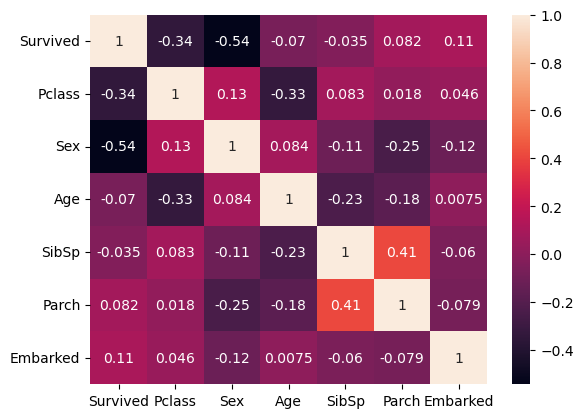

In [85]:
df.corr()
sns.heatmap(df.corr(),annot = True)

In [86]:
#sns.pairplot(df)

In [87]:
X_train = df.drop('Survived',axis =1)
Y_train = df['Survived']

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
Lr = LogisticRegression()

In [90]:
Lr.fit(X_train,Y_train)

LogisticRegression()

In [91]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [92]:
Lr.score(X_train,Y_train)

0.7991021324354658

In [93]:
test = pd.read_csv("test.csv")

In [94]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [95]:
test['Sex'].replace(['male','female'],[1,0],inplace=True)
test['Embarked'].replace(['S','C','Q'],[1,2,3],inplace= True)
test.drop('Cabin',axis = 1,inplace=True)
test.drop('Ticket',axis =1,inplace=True)
test.drop('Name',axis=1,inplace=True)
p = test['PassengerId']
test.drop('PassengerId',axis=1,inplace=True)
test.drop('Fare',inplace=True,axis=1)

In [96]:
test

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,3
1,3,0,47.0,1,0,1
2,2,1,62.0,0,0,3
3,3,1,27.0,0,0,1
4,3,0,22.0,1,1,1
...,...,...,...,...,...,...
413,3,1,NaN,0,0,1
414,1,0,39.0,0,0,2
415,3,1,38.5,0,0,1
416,3,1,NaN,0,0,1


In [97]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [98]:
test['Age'].fillna(np.mean(df['Age']),inplace=True)

In [99]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [100]:
#test['Fare'].fillna(np.mean(df['Fare']),inplace=True)

In [101]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [102]:
pre = Lr.predict(test)

In [103]:
Y = pd.read_csv("gender_submission.csv")

In [104]:
Y_test = Y['Survived']

In [105]:
Lr.score(test,Y_test)

0.9210526315789473

In [106]:
print(p.shape)
print(Y.shape)

(418,)
(418, 2)


In [107]:
output = pd.DataFrame({'PassengerId': p, 'Survived': pre})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
